# Settings

In [400]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

# Read dataset

Read in data set

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')

# Explore

In [3]:
df.head(10)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.0
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.0
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.0
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.0
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.0


The data exist of 19 different variables and 27 unique ID's.

In [4]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,376912,NaN,NaN,NaN,450127,541152,1,94228.8,227438,516041,1.42771e+07
id,376912,27,AS14.01,21999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,376912,336907,2014-04-14 12:00:00.000,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable,376912,19,screen,96578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,376710,NaN,NaN,NaN,40.6653,273.726,-82798.9,2.025,7.029,29.356,33960.2


In [22]:
user = df.loc[df['id'] == 'AS14.01']

In [23]:
user.head(5)

,Unnamed: 0,id,time,variable,value,date
0,1,AS14.01,2014-02-26 13:00:00,mood,6.0,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00,mood,6.0,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00,mood,6.0,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00,mood,7.0,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00,mood,6.0,2014-02-27


# Transform

This creates an instance-based dataset with window of 5 days. It iterates from last day to first day.

Most of the attributes are calculated by taking a mean over the window. However, the sms and call attributes are counts over the window. The sixth day is the target attribute with a mean of the mood.

In [367]:
window = 5
column_names = ['id', 'mood', 'arousel', 'valence', 'activity', 'screen', 'call', 'sms', 'builtin',
               'communication', 'entertainment', 'finance', 'game', 'office', 'other',
               'social', 'travel', 'unknown', 'utilities', 'weather', 'mood_target']
data = pd.DataFrame(columns=column_names)
h = df.groupby(['id'])

for name, group in h:
    print(name)
    user = df[df['id'] == name].sort_values(by=['date'], ascending=False)
    date = user['date'].iloc[0]

    times = (user['date'].max() - user['date'].min())
    iteration = times.days - window

    df2 = pd.DataFrame(index=np.arange(iteration), columns=column_names)

    for i in range(iteration):
        mask = (user['date'] >= date - timedelta(days=5+i)) & (user['date'] <= date - timedelta(days=1+i))
        new = user.loc[mask]
        df2.iloc[i,0] = name
        df2.iloc[i,1] = new[new['variable'] == 'mood']['value'].mean()
        df2.iloc[i,2] = new[new['variable'] == 'circumplex.arousel']['value'].mean()
        df2.iloc[i,3] = new[new['variable'] == 'circumplex.valence']['value'].mean()
        df2.iloc[i,4] = new[new['variable'] == 'activity']['value'].mean()
        df2.iloc[i,5] = new[new['variable'] == 'screen']['value'].mean()
        df2.iloc[i,6] = new[new['variable'] == 'call']['value'].sum()
        df2.iloc[i,7] = new[new['variable'] == 'sms']['value'].sum()
        df2.iloc[i,8] = new[new['variable'] == 'appCat.builtin']['value'].mean()
        df2.iloc[i,9] = new[new['variable'] == 'appCat.communication']['value'].mean()
        df2.iloc[i,10] = new[new['variable'] == 'appCat.entertainment']['value'].mean()
        df2.iloc[i,11] = new[new['variable'] == 'appCat.finance']['value'].mean()
        df2.iloc[i,12] = new[new['variable'] == 'appCat.game']['value'].mean()
        df2.iloc[i,13] = new[new['variable'] == 'appCat.office']['value'].mean()
        df2.iloc[i,14] = new[new['variable'] == 'appCat.other']['value'].mean()
        df2.iloc[i,15] = new[new['variable'] == 'appCat.social']['value'].mean()
        df2.iloc[i,16] = new[new['variable'] == 'appCat.travel']['value'].mean()
        df2.iloc[i,17] = new[new['variable'] == 'appCat.unknown']['value'].mean()
        df2.iloc[i,18] = new[new['variable'] == 'appCat.utilities']['value'].mean()
        df2.iloc[i,19] = new[new['variable'] == 'appCat.weather']['value'].mean()

        last = user[user['date'] == date - timedelta(days=i)]
        df2.iloc[i,20] = last[last['variable'] == 'mood']['value'].mean()
        
    data = data.append(df2, ignore_index=True)

AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


# Clean

A lot of NaN's. First, NaN's with time attribute means that user has spend zero time, hence change that to zero. Second, remove all rows where mood_target is a NaN. Third, it looks like arousel is everywhere NaN, thus remove and possibly look into why that is the case. Finally, left over NaN's can be replaced by mean of column.

In [372]:
data.tail(100)

,id,mood,arousel,valence,activity,screen,call,sms,builtin,communication,...,finance,game,office,other,social,travel,unknown,utilities,weather,mood_target
1892,AS14.32,NaN,NaN,NaN,NaN,NaN,33,6,0.000000,0.000000,...,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
1893,AS14.32,NaN,NaN,NaN,NaN,NaN,35,5,0.000000,0.000000,...,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
1894,AS14.33,6.69565,NaN,0.391304,0.116955,138.09,30,7,10.291709,44.049713,...,0.0,0.0,54.271,20.209816,91.593660,36.330586,2.690667,12.417808,0.0,7
1895,AS14.33,6.59091,NaN,0.571429,0.111667,139.849,28,8,10.340124,41.209114,...,0.0,0.0,54.271,20.417354,81.262474,0.939000,0.000000,9.843158,0.0,6.8
1896,AS14.33,6.5,NaN,0.454545,0.0772077,144.671,23,7,10.788295,40.908158,...,0.0,0.0,54.271,20.181608,82.563046,0.000000,0.000000,10.813000,0.0,7
1897,AS14.33,6,NaN,0.173913,0.0595482,163.512,14,7,11.454054,41.483089,...,0.0,0.0,130.530,15.518692,94.386181,0.000000,0.000000,13.923182,0.0,8.2
1898,AS14.33,5.91667,NaN,0.136364,0.0606748,162.456,19,5,11.516591,38.694951,...,0.0,0.0,130.530,15.111353,95.258864,0.000000,0.000000,10.582000,0.0,6.2
1899,AS14.33,6.04,NaN,0.0909091,0.0453002,142.754,9,2,12.301390,44.216806,...,0.0,0.0,0.000,13.302692,97.615763,0.000000,0.000000,10.582000,0.0,5.4
1900,AS14.33,6.04,NaN,0.130435,0.0163968,187.837,7,1,9.993057,50.633727,...,0.0,0.0,0.000,13.421154,123.377124,0.000000,2.010000,4.419000,0.0,6.25
1901,AS14.33,6,NaN,0.125,0.0152955,195.398,7,1,8.888906,53.525687,...,0.0,0.0,0.000,13.874077,128.183530,0.000000,2.010000,4.419000,0.0,6.4


Change NaN's of time attributes to zero, drop every row where mood_target is NaN and drop arousel column.

In [436]:
data[['builtin','communication', 'entertainment', 'finance', 'game', 'office', 'other',
     'social', 'travel', 'unknown', 'utilities', 'weather']] = data[['builtin','communication', 'entertainment', 'finance', 'game', 'office', 'other',
     'social', 'travel', 'unknown', 'utilities', 'weather']].fillna(0)

data_clean = data.dropna(subset=['mood_target'])
data_clean = data_clean.drop(['arousel'],axis = 1)

Change most columns to float and replace NaN's with mean of corresponding column.

In [437]:
data_clean[['mood','valence', 'activity', 'screen', 'call', 'sms', 'builtin',
               'communication', 'entertainment', 'finance', 'game', 'office', 'other',
               'social', 'travel', 'unknown', 'utilities', 'weather', 'mood_target']] = data_clean[['mood','valence', 'activity', 'screen', 'call', 'sms', 'builtin',
               'communication', 'entertainment', 'finance', 'game', 'office', 'other',
               'social', 'travel', 'unknown', 'utilities', 'weather', 'mood_target']].astype(float)

data_clean = data_clean.fillna(data_clean.mean())

In [438]:
data_clean.sample(50)

,id,mood,valence,activity,screen,call,sms,builtin,communication,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather,mood_target
957,AS14.17,7.136364,0.772727,0.120016,81.196557,5.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.400000
1015,AS14.19,6.090909,0.500000,0.088446,70.567421,31.0,0.0,23.223538,66.820219,4.354167,0.000000,0.000000,0.000000,20.739872,36.067250,0.000000,0.000000,0.000000,0.000000,6.000000
1376,AS14.26,6.708333,0.208333,0.120016,81.196557,5.0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
1130,AS14.23,7.260870,0.869565,0.419309,53.400267,6.0,0.0,21.511852,30.968003,63.020867,0.000000,46.091250,94.514969,15.964246,23.367278,33.080250,29.846818,24.792625,0.000000,7.000000
398,AS14.07,6.235294,0.529412,0.120016,103.800145,3.0,3.0,15.326647,37.768668,226.674968,0.000000,0.000000,0.000000,24.950000,96.316768,92.480700,38.998455,31.218000,0.000000,7.750000
1075,AS14.20,6.857143,0.571429,0.061317,51.576689,6.0,1.0,9.666132,20.206550,27.191429,9.424875,231.263667,0.000000,7.755345,83.722105,46.717000,0.000000,0.000000,0.000000,6.800000
1816,AS14.32,6.750000,0.187500,0.105218,51.484011,41.0,2.0,26.078801,54.784454,12.569232,0.000000,0.000000,0.000000,9.574250,268.880286,30.816795,0.000000,0.000000,0.000000,7.200000
707,AS14.14,7.200000,0.950000,0.048433,31.540414,3.0,1.0,290.278446,21.042444,0.000000,0.000000,0.000000,0.000000,10.748043,30.339875,0.000000,0.000000,0.000000,0.000000,7.500000
37,AS14.01,6.541667,0.500000,0.105877,104.600203,17.0,2.0,20.720264,49.780107,97.308054,10.033692,116.518000,14.266231,20.911933,79.314028,61.543385,29.402875,26.933412,0.000000,8.000000
1843,AS14.32,8.050000,0.550000,0.101597,48.571265,34.0,5.0,16.716159,48.863695,12.223910,0.000000,0.000000,0.000000,10.324667,151.129167,77.551333,0.000000,13.118000,0.000000,7.500000


# Exploration of pre-processed dataset

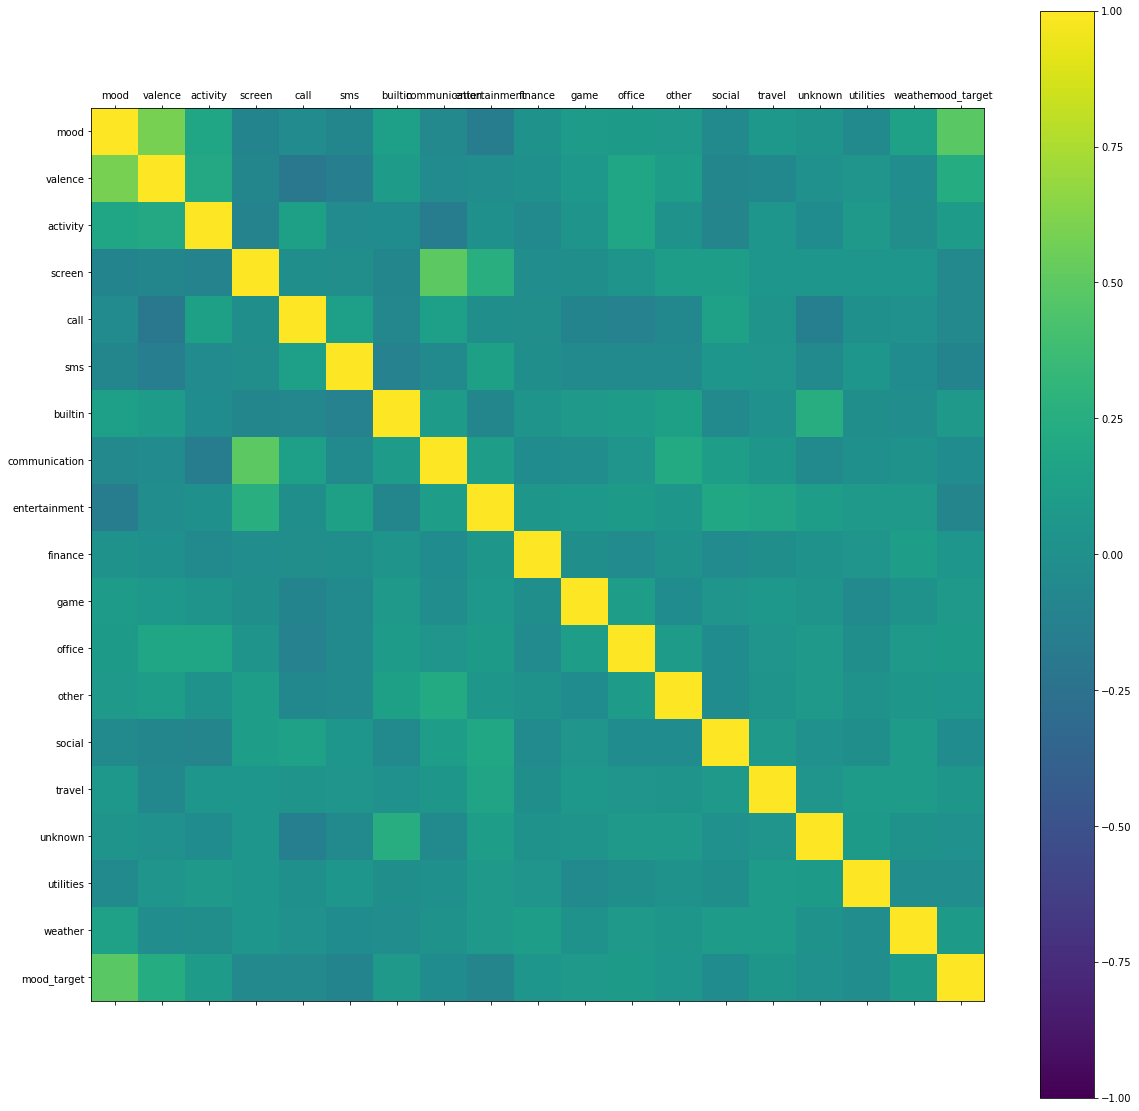

In [439]:
names = ['mood', 'valence', 'activity', 'screen', 'call', 'sms', 'builtin',
               'communication', 'entertainment', 'finance', 'game', 'office', 'other',
               'social', 'travel', 'unknown', 'utilities', 'weather', 'mood_target']
correlations = data_clean.iloc[:,1:].corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [408]:
from pandas.plotting import scatter_matrix

Mood and valance seems to have high correlation. Thus, be carefull when using linear regression with the inclusion of these two attributes.

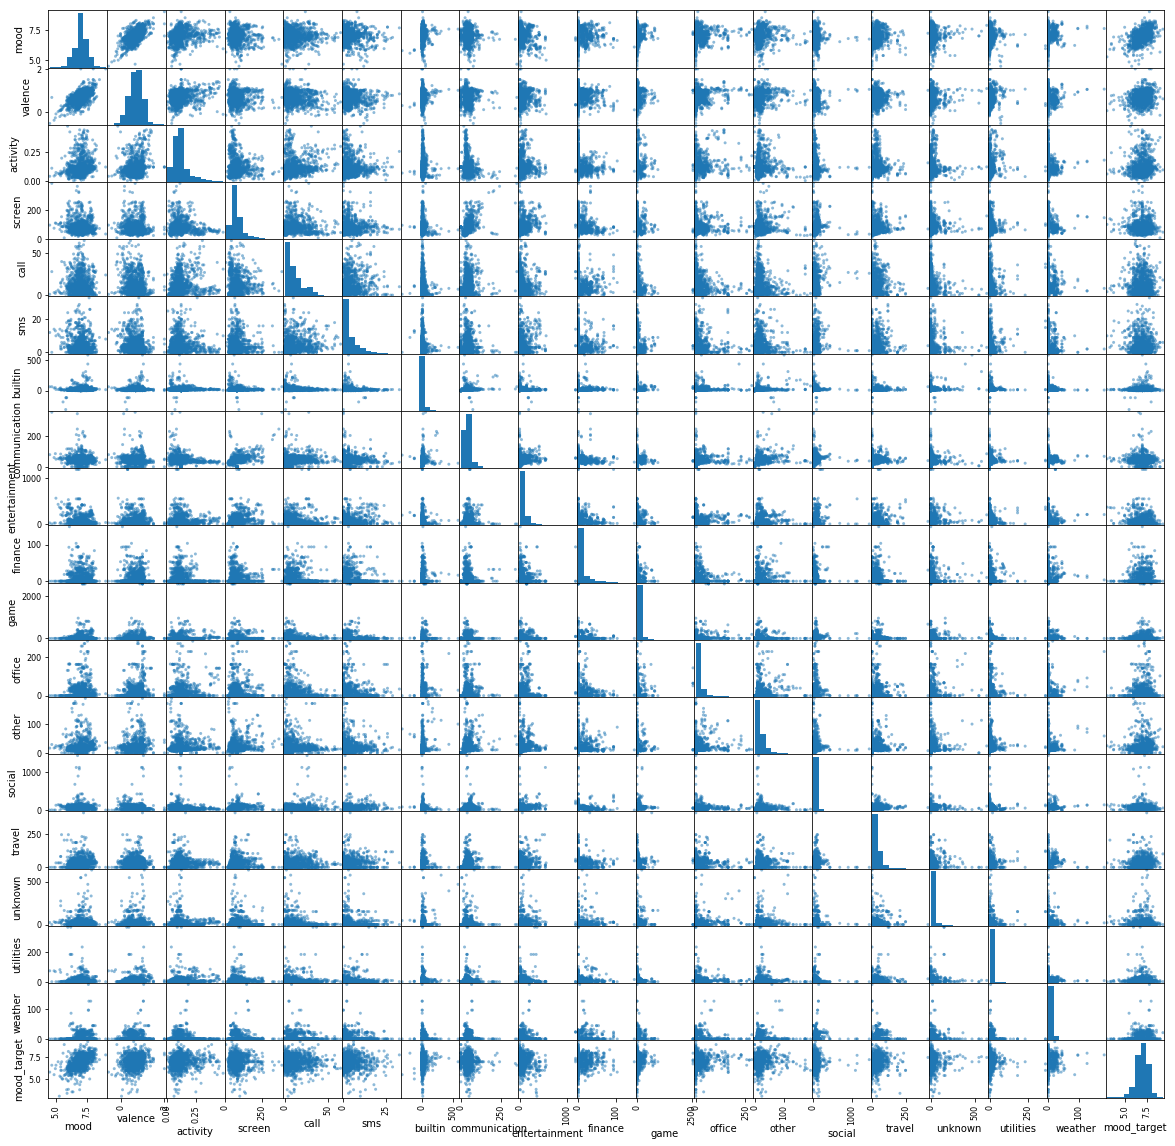

In [419]:
scatter_matrix(data_clean.iloc[:,1:], figsize=(20, 20))
plt.show()

# Save to disk

In [440]:
data_clean.to_csv('transformed_version1.csv')